In [1]:
from pathlib import Path

import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [99]:
def laplace_multiplicand(fileID, band):
    fires = io.imread(fileID);
    firstChannel = np.squeeze(fires[:,:,0])
    height, width = firstChannel.shape
    smallFires = resize(firstChannel, (round(height/2), round(width/2)))*255
    blurryFires = resize(smallFires, (height, width))
    details = firstChannel - blurryFires
    laplace_edges = laplace(blurryFires)
    
    table = []
    amount = 0
    while amount <= 1:
        sharped_image = blurryFires+laplace_edges * amount
        abs_error = abs(firstChannel-sharped_image)
        mean = abs_error.mean()
        sqrt = np.sqrt(((details- laplace_edges * amount)**2).mean())
        table.append({'Filename': fileID,'Band': band,'Multiplicand': amount, 'Mean Error': mean, 'Square Root': sqrt})
        amount = amount + .1
    
    return pd.DataFrame(table)

In [81]:
list7 = ['GOES-17_ABI_RadC_C07_20181115_170218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_171218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_172218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_173218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_174218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_175218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_180218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_181218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_183218_cali.tif',
'GOES-17_ABI_RadC_C07_20181115_184218_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_170119_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_171419_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_172719_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_174019_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_175319_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_180619_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_181919_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_183219_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_184519_cali.tif',
'GOES-17_ABI_RadC_C07_20181116_185819_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_170218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_171218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_172218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_173218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_174218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_175218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_180218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_181218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_182218_cali.tif',
'GOES-17_ABI_RadC_C07_20181117_183218_cali.tif']

In [ ]:
list14 = ['GOES-17_ABI_RadC_C14_20181115_170218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_171218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_172218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_173218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_174218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_175218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_180218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_181218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_183218_cali.tif',
'GOES-17_ABI_RadC_C14_20181115_184218_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_170119_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_171419_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_172719_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_174019_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_175319_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_180619_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_181919_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_183219_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_184519_cali.tif',
'GOES-17_ABI_RadC_C14_20181116_185819_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_170218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_171218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_172218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_173218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_174218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_175218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_180218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_181218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_182218_cali.tif',
'GOES-17_ABI_RadC_C14_20181117_183218_cali.tif']

In [94]:
laplace_multiplicand('TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif','07')

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.0,1.699231,2.378094
1,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.1,1.649318,2.294962
2,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.2,1.607010,2.224321
3,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.3,1.573478,2.167394
4,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.4,1.549572,2.125283
5,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.5,1.535613,2.098881
6,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.6,1.531609,2.088781
7,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.7,1.537398,2.095222
8,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.8,1.552775,2.118050
9,TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_2018...,07,0.9,1.576942,2.156747


In [69]:
cd Fires

/home/jovyan/Fires


In [89]:
# creates a table out of all the c14 files
dfc14 = pd.concat((laplace_multiplicand(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [90]:
#creates a table out of all the c07 files
dfc07 = pd.concat((laplace_multiplicand(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [91]:
df_all = pd.concat([dfc14, dfc07])

In [95]:
df_all

,Filename,Band,Multiplicand,Mean Error,Square Root
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.0,1.993900,2.937043
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.1,1.934093,2.832672
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.2,1.883747,2.745723
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.3,1.844548,2.677895
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,0.4,1.817810,2.630667
...,...,...,...,...,...
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.6,1.414960,1.872903
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.7,1.417593,1.872865
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.8,1.428059,1.885348
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,0.9,1.445897,1.910108


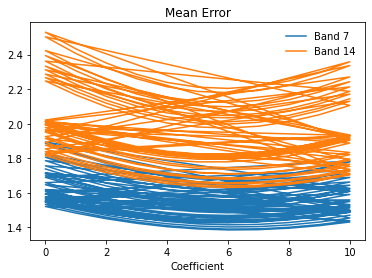

In [129]:
df = df_all
# df = df.cumsum()
plt.title('Mean Error')
plt.xlabel('Coefficient')
df.groupby('Band')['Mean Error'].plot()
plt.legend(['Band 7', 'Band 14'], frameon = False, )

<AxesSubplot:>

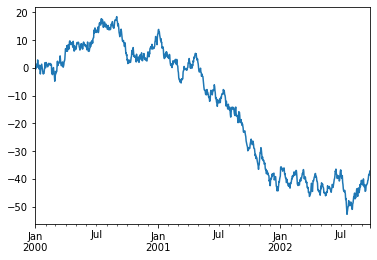

In [104]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

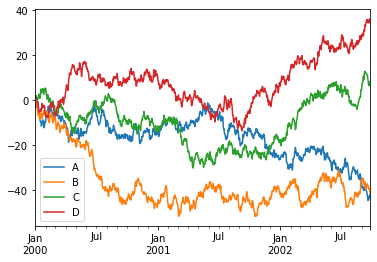

In [106]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()

In [ ]:
#posi_file = df.loc(Filename['TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif'])

In [ ]:
#posi_file = df.loc(Filename[fileID])